In [37]:
#Import necessary libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.tree import export_graphviz

In [2]:
os.getcwd()

'/Users/robinredhu'

In [3]:
# Set the working directory
os.chdir('/Users/robinredhu/Downloads/')

In [4]:
# Load the training and test dataset
train_data = pd.read_csv('../Downloads/Train_data.csv')
test_data = pd.read_csv('../Downloads/Test_data.csv')

In [5]:
#Have a look at the data
train_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
test_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


In [7]:
train_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
test_data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,436.369526,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,39.400755,41.890588,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,408.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,408.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,98.000000,415.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,415.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
max,238.000000,510.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


In [9]:
train_data.dtypes
train_data['area code'] = train_data['area code'].astype(object)
test_data.loc[:,'area code'] = test_data.loc[:,'area code'].astype(object)
train_data.dtypes

state                             object
account length                     int64
area code                         object
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [10]:
#Check for NA values for training data
missing_val_train = pd.DataFrame(train_data.isnull().sum())
missing_val_train = missing_val_train.reset_index()
#Check for NA values for testing data
missing_val_test = pd.DataFrame(test_data.isnull().sum())
missing_val_test = missing_val_test.reset_index()

In [11]:
missing_val_train

,index,0
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


In [12]:
missing_val_test

,index,0
0,state,0
1,account length,0
2,area code,0
3,phone number,0
4,international plan,0
5,voice mail plan,0
6,number vmail messages,0
7,total day minutes,0
8,total day calls,0
9,total day charge,0


In [13]:
#As we can see that there are no missing data next we will move to next step that is feature selection
#First of all we will didvide the dataset into categorical and numerical dataset then further 

In [14]:
#This will convert the categorical variable to numbers
for i in train_data.columns:
    if(train_data[i].dtypes == 'object'):
        print(i)
        train_data.loc[:, i] = pd.Categorical(train_data.loc[:, i])
        train_data.loc[:, i] = train_data.loc[:, i].cat.codes

for i in test_data.columns:
    if(test_data[i].dtypes == 'object'):
        print(i)
        test_data.loc[:, i] = pd.Categorical(test_data.loc[:, i])
        test_data.loc[:, i] = test_data.loc[:, i].cat.codes

state
area code
phone number
international plan
voice mail plan
Churn
state
area code
phone number
international plan
voice mail plan
Churn


In [15]:
print(test_data.shape)
print(train_data.shape)
train_data.head()
test_data.head()

(1667, 21)
(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,11,101,2,451,0,0,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,26,137,2,905,0,0,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,35,103,0,1467,0,1,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,32,99,1,1601,0,0,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,40,108,1,1501,0,0,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [16]:
#Now creating a variable to store categorical variables
cnames_cat = ['state', 'area code', 'phone number', 'international plan', 'voice mail plan']

In [17]:
#Now we will calculate the p value, degree of freedom using chi-square test.
for i in cnames_cat:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train_data['Churn'], train_data[i]))
    print(p)

state
0.00229622155201
area code
0.915055696024
phone number
0.491856084559
international plan
2.49310770332e-50
voice mail plan
5.15063965904e-09


In [18]:
#From the results obtained we will discard area code and phone number variables as they have greater p value than 0.05

In [19]:
#Now we will do co-relation test to check multi collineartiy
cnames_num = list(set(list(train_data)) - set(cnames_cat))

In [20]:
#Corelation analysis
df_corr = train_data.loc[:, cnames_num]

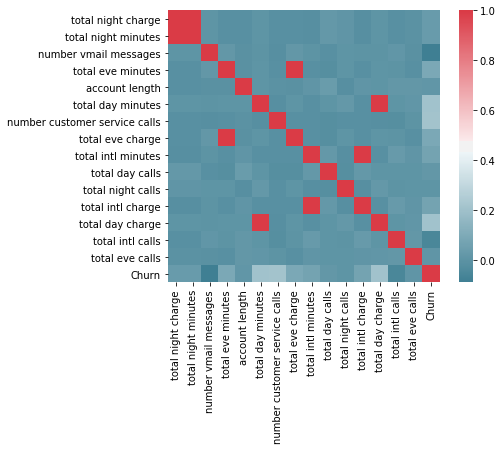

In [21]:
#Setting height ans width of the plot
f, ax = plt.pyplot.subplots(figsize = (7,5))

#Generating co-relation matrix
corr = df_corr.corr()

#Plot the Co-relation matrix
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True, ax = ax)
plt.pyplot.show()

In [22]:
# Now we can see that variables total intl minutes, total night minutes, total eve minutes, total day minutes have
# redundant information so we will remove them
cnames = list(set(list(train_data)) - set(['total intl minutes', 'total night minutes', 'total eve minutes', 
                                          'total day minutes', 'area code', 'phone number']))

In [23]:
cnames

['total night charge',
 'number vmail messages',
 'account length',
 'international plan',
 'state',
 'number customer service calls',
 'total eve charge',
 'total day calls',
 'total night calls',
 'total intl charge',
 'total day charge',
 'total intl calls',
 'voice mail plan',
 'total eve calls',
 'Churn']

In [24]:
# Subsetting the dataset
train_data = train_data.loc[:, cnames]
test_data = test_data.loc[:, cnames]
cnames2 = list(set(list(train_data)) - set(['Churn']))
train_data.shape

(3333, 15)

In [25]:
#Here we will train the classifier model
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(train_data.loc[:, cnames2], train_data.loc[:,"Churn"])

In [26]:
#Here we will predict the target variable
pred = clf.predict(test_data.loc[:,cnames2])

In [27]:
#Now we will check the results
print('Performance evaluation of {}'.format("Decision Tree Classification"))
print('Accuracy is {}'.format(accuracy_score(test_data.loc[:, "Churn"],pred)))
print('Precision is {}'.format(precision_score(test_data.loc[:, "Churn"],pred)))
print('Recall score is {}'.format(recall_score(test_data.loc[:, "Churn"],pred)))
print('F1 score is {}'.format(f1_score(test_data.loc[:, "Churn"],pred, average='macro')))

Performance evaluation of Decision Tree Classification
Accuracy is 0.9232153569286142
Precision is 0.7264150943396226
Recall score is 0.6875
F1 score is 0.8311268131770724


In [28]:
# Here we will generate the tree
dotfile = open('DeciTree.dot', 'w')
df = tree.export_graphviz(clf, out_file=dotfile, feature_names=cnames2)

In [29]:
# Now we will use random forest technique to generate the results
Rand_Model = RandomForestClassifier(n_estimators=500).fit(train_data.loc[:, cnames2], train_data.loc[:,"Churn"])

In [30]:
#Here we will predict the target variable
Rand_Prediction = Rand_Model.predict(test_data.loc[:,cnames2])

In [31]:
#Now we will check the results of random forest
print('Performance evaluation of {}'.format("Random Forest Classification"))
print('Accuracy is {}'.format(accuracy_score(test_data.loc[:, "Churn"],Rand_Prediction)))
print('Precision is {}'.format(precision_score(test_data.loc[:, "Churn"],Rand_Prediction)))
print('Recall score is {}'.format(recall_score(test_data.loc[:, "Churn"],Rand_Prediction)))
print('F1 score is {}'.format(f1_score(test_data.loc[:, "Churn"],Rand_Prediction, average='macro')))

Performance evaluation of Random Forest Classification
Accuracy is 0.9568086382723455
Precision is 0.9691358024691358
Recall score is 0.7008928571428571
F1 score is 0.89452408236725


In [32]:
# Now we will build Logistic regression model
LnModel = sm.OLS(train_data.loc[:, "Churn"], train_data.loc[:, cnames2]).fit()

In [33]:
# Now we will summarise the model
LnModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                      12.857
Model:                            OLS   Adj. R-squared:                 12.907
Method:                 Least Squares   F-statistic:                    -257.1
Date:                Thu, 24 May 2018   Prob (F-statistic):               1.00
Time:                        16:21:54   Log-Likelihood:                -943.96
No. Observations:                3333   AIC:                             1916.
Df Residuals:                    3319   BIC:                             2001.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
total night charge                0.0013      0.002      0.558      0.577      -0.003       0.006
number vmail messages             0.0019      0.001      1.354      0.176      -0.001       0.005
international plan                0.3025      0.019     15.992      0.000       0.265       0.340
state                            -0.0001      0.000     -0.310      0.756      -0.001       0.001
number customer service calls     0.0542      0.004     12.876      0.000       0.046       0.062
total eve charge                  0.0044      0.001      3.654      0.000       0.002       0.007
total day calls                  -0.0005      0.000     -1.915      0.056      -0.001    1.16e-05
total night calls                -0.0008      0.000     -3.108      0.002      -0.001      -0.000
total intl charge                 0.0134      0.007      1.897      0.058      -0.000       0.027
total day charge                  0.0063      0.001     10.828      0.000       0.005       0.007
total intl calls                 -0.0103      0.002     -4.558      0.000      -0.015      -0.006
voice mail plan                  -0.1393      0.043     -3.241      0.001      -0.224      -0.055
total eve calls                  -0.0007      0.000     -2.845      0.004      -0.001      -0.000
account length                -8.968e-05      0.000     -0.651      0.515      -0.000       0.000
==============================================================================
Omnibus:                      869.471   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1769.136
Skew:                           1.567   Prob(JB):                         0.00
Kurtosis:                       4.708   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Now we will predict the values
prediction = LnModel.predict(test_data.loc[:,cnames2])

In [35]:
# Here we will round off the values
prediction = np.round(prediction)

In [36]:
#Now we will check the results of Linear regression model
print('Performance evaluation of {}'.format("Logistic Regression Result"))
print('Accuracy is {}'.format(accuracy_score(test_data.loc[:, "Churn"],prediction)))
print('Precision is {}'.format(precision_score(test_data.loc[:, "Churn"],prediction)))
print('Recall score is {}'.format(recall_score(test_data.loc[:, "Churn"],prediction)))
print('F1 score is {}'.format(f1_score(test_data.loc[:, "Churn"],prediction, average='macro')))

Performance evaluation of Logistic Regression Result
Accuracy is 0.874625074985003
Precision is 0.7142857142857143
Recall score is 0.11160714285714286
F1 score is 0.5625413566876981
